# Importing data and preliminary cleaning

In [ ]:
%%capture
!pip install pandasql

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crash_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/CRASH_2019_STATEWIDE.csv") 
flag_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/FLAG_2019_STATEWIDE.csv")
person_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/PERSON_2019_STATEWIDE.csv")
roadway_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/ROADWAY_2019_STATEWIDE.csv")
vehicle_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/VEHICLE_2019_STATEWIDE.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dfs= [crash_df, flag_df]
df_all = reduce(lambda left,right: pd.merge(left,right,on='CRN'), dfs)

In [ ]:
df_selected = df_all[['LOCAL_ROAD', 'FATAL_COUNT','ARRIVAL_TM','COLLISION_TYPE','COUNTY_x','CRASH_MONTH','CRN','DAY_OF_WEEK','DEC_LAT','DEC_LONG','DISPATCH_TM','DISTRICT','HOUR_OF_DAY','ILLUMINATION','INTERSECT_TYPE','LOCATION_TYPE','MAX_SEVERITY_LEVEL','MUNICIPALITY','RDWY_SURF_TYPE_CD','RELATION_TO_ROAD','ROAD_CONDITION','TCD_FUNC_CD','TCD_TYPE','TFC_DETOUR_IND','TIME_OF_DAY','URBAN_RURAL','WEATHER1','WEATHER2','WORK_ZONE_IND','WORK_ZONE_LOC','WORK_ZONE_TYPE','WZ_FLAGGER','WZ_LAW_OFFCR_IND','AGGRESSIVE_DRIVING','ALCOHOL_RELATED','ANGLE_CRASH','CELL_PHONE','CROSS_MEDIAN','CURVE_DVR_ERROR','CURVED_ROAD','DEER_RELATED','DISTRACTED','DRUG_RELATED','DRUGGED_DRIVER','DRINKING_DRIVER','FATAL','FATAL_OR_SUSP_SERIOUS_INJ','FATIGUE_ASLEEP','HIT_DEER','HIT_FIXED_OBJECT','HIT_POLE','HIT_TREE_SHRUB','ICY_ROAD','ILLUMINATION_DARK','INTERSECTION','INTERSTATE','LANE_DEPARTURE','LEFT_TURN','PERSON_COUNT','REAR_END','SIGNALIZED_INT','RUNNING_RED_LT','RUNNING_STOP_SIGN','SPEEDING','SUSP_SERIOUS_INJ_COUNT','SPEEDING_RELATED','STOP_CONTROLLED_INT','SUDDEN_DEER','TURNPIKE','WET_ROAD']]

In [ ]:
#Proportion of observations that are NaNs
nan = pd.DataFrame(df_selected.isna().sum()/df_selected.shape[0],  columns=['Proportion of NaNs'])
nan = nan.sort_values(by = 'Proportion of NaNs', ascending=False)

In [ ]:
pd.set_option('display.max_rows', nan.shape[0]+1)
nan

,Proportion of NaNs
RDWY_SURF_TYPE_CD,0.992097
WZ_FLAGGER,0.989534
WORK_ZONE_LOC,0.987028
WORK_ZONE_TYPE,0.987020
WZ_LAW_OFFCR_IND,0.987020
WEATHER2,0.940838
TFC_DETOUR_IND,0.436527
DISPATCH_TM,0.004798
DEC_LONG,0.004542
DEC_LAT,0.004502


In [ ]:
#drop colums with proportion of nans > 5%
df_selected2 = df_selected.drop(columns=['WZ_FLAGGER','WORK_ZONE_LOC','WZ_LAW_OFFCR_IND','WORK_ZONE_TYPE','RDWY_SURF_TYPE_CD','WEATHER2','TFC_DETOUR_IND'])
df_want = df_selected2.dropna()

In [ ]:
print("Number of observations used/ total number of observations:", df_want.shape[0]/df_all.shape[0]*100, "%")

Number of observations used/ total number of observations: 99.07317228936823 %


In [ ]:
df_want

,LOCAL_ROAD,FATAL_COUNT,ARRIVAL_TM,COLLISION_TYPE,COUNTY_x,CRASH_MONTH,CRN,DAY_OF_WEEK,DEC_LAT,DEC_LONG,DISPATCH_TM,DISTRICT,HOUR_OF_DAY,ILLUMINATION,INTERSECT_TYPE,LOCATION_TYPE,MAX_SEVERITY_LEVEL,MUNICIPALITY,RELATION_TO_ROAD,ROAD_CONDITION,TCD_FUNC_CD,TCD_TYPE,TIME_OF_DAY,URBAN_RURAL,WEATHER1,WORK_ZONE_IND,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,CELL_PHONE,CROSS_MEDIAN,CURVE_DVR_ERROR,CURVED_ROAD,DEER_RELATED,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,DRINKING_DRIVER,FATAL,FATAL_OR_SUSP_SERIOUS_INJ,FATIGUE_ASLEEP,HIT_DEER,HIT_FIXED_OBJECT,HIT_POLE,HIT_TREE_SHRUB,ICY_ROAD,ILLUMINATION_DARK,INTERSECTION,INTERSTATE,LANE_DEPARTURE,LEFT_TURN,PERSON_COUNT,REAR_END,SIGNALIZED_INT,RUNNING_RED_LT,RUNNING_STOP_SIGN,SPEEDING,SUSP_SERIOUS_INJ_COUNT,SPEEDING_RELATED,STOP_CONTROLLED_INT,SUDDEN_DEER,TURNPIKE,WET_ROAD
0,1,1,508.0,1,21,11,2019124876,7,40.2036,-77.3515,500.0,8,5,2,0,0,1,21219,1,0,0,0,500,1,3.0,N,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0
3,0,0,2035.0,1,67,5,2020008628,5,39.9586,-75.1683,2024.0,6,17,3,0,0,3,67301,1,0,0,0,1737,3,3.0,N,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3,1,0,0,0,0,0,1,0,0,0,0
4,0,0,435.0,7,29,9,2019088646,1,40.0343,-77.9084,422.0,9,4,2,0,0,3,29209,4,0,0,0,418,1,3.0,N,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
23,1,0,1400.0,0,48,8,2019086614,3,40.7655,-75.3857,1345.0,5,13,1,1,0,0,48211,5,0,0,0,1345,1,3.0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24,0,0,1550.0,1,23,9,2019092437,7,39.8478,-75.4331,1544.0,6,15,1,0,0,8,23110,1,0,0,0,1544,3,3.0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125261,0,0,1444.0,4,40,8,2019085671,7,41.1511,-75.9626,1442.0,4,14,1,2,2,9,40226,1,99,3,3,1439,1,99.0,N,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0
125262,1,0,1825.0,99,67,8,2019086135,2,39.9761,-75.1602,1825.0,6,18,1,1,0,0,67301,9,99,3,2,1820,3,99.0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
125263,1,0,330.0,5,67,7,2019088504,7,39.9826,-75.1737,328.0,6,3,3,0,0,0,67301,6,99,0,0,320,3,99.0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125264,0,0,200.0,7,40,10,2019109794,4,41.3238,-75.7676,155.0,4,1,6,0,0,9,40412,4,99,0,0,152,3,99.0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Weather

Firstly, we want to look at the relationship between weather and whether or not the crash is fatal.  We first group by weather.

In [ ]:
crash_by_weather = df_want.groupby(by = 'WEATHER1').sum()[['FATAL_OR_SUSP_SERIOUS_INJ']]
legend_weather = [
(1, "Blowing Sand, Soil, Dirt"),
(2, "Blowing Snow"),
(3, "Clear"),
(4, "Cloudy"),
(5, "Fog, Smog, Smoke"),
(6, "Freezing Rain or Freezing Drizzle"),
(7, "Rain"),
(8, "Severe Crosswinds"),
(9, "Sleet or Hail"),
(10, "Snow"),
(98, "Other"),
(99, "Unknown")]
legend_weather = pd.DataFrame(legend_weather, columns =['WEATHER1','Description'])
crash_by_weather = crash_by_weather.merge(legend_weather, on = 'WEATHER1')
temp = df_want.groupby(by = 'WEATHER1').count()[['CRN']]
crash_by_weather = crash_by_weather.merge(temp, on = 'WEATHER1')
crash_by_weather['Fatal to crash'] = crash_by_weather['FATAL_OR_SUSP_SERIOUS_INJ'] / crash_by_weather['CRN']
crash_by_weather['WEATHER1'] = crash_by_weather['WEATHER1'].apply(lambda x: str(x))
crash_by_weather

,WEATHER1,FATAL_OR_SUSP_SERIOUS_INJ,Description,CRN,Fatal to crash
0,1.0,0,"Blowing Sand, Soil, Dirt",3,0.000000
1,2.0,4,Blowing Snow,170,0.023529
2,3.0,4072,Clear,97151,0.041914
3,4.0,34,Cloudy,800,0.042500
4,5.0,32,"Fog, Smog, Smoke",644,0.049689
5,6.0,13,Freezing Rain or Freezing Drizzle,446,0.029148
6,7.0,505,Rain,15947,0.031667
7,8.0,1,Severe Crosswinds,17,0.058824
8,9.0,8,Sleet or Hail,677,0.011817
9,10.0,131,Snow,6855,0.019110


[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '98.0'),
 Text(0, 0, '99.0')]

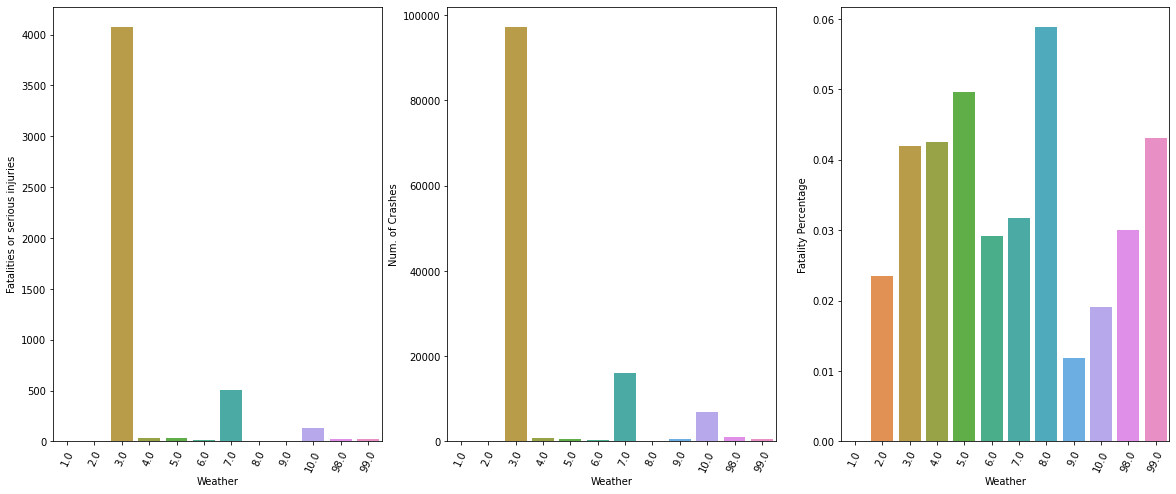

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x = 'WEATHER1', y = "FATAL_OR_SUSP_SERIOUS_INJ", 
              data = crash_by_weather, ax = ax1)
ax1.set(xlabel = 'Weather', ylabel='Fatalities or serious injuries')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=65)


sns.barplot(x = 'WEATHER1', y = "CRN", 
              data = crash_by_weather, ax = ax2)
ax2.set(xlabel = 'Weather', ylabel='Num. of Crashes')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=65)


ax3 = sns.barplot(x = 'WEATHER1', y = "Fatal to crash", 
              data = crash_by_weather, ax = ax3)
ax3.set(xlabel = 'Weather', ylabel='Fatality Percentage')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=65)

We can observe that clear weather is most common in the dataset and hence has the highest number of fatalities by count.  However, after scaling for the number of crashes, severe crosswinds pose the highest fatality rate, followed closely by freezing rain.  Snow has a relatively low fatality.

Looking at the datasets for 2015-2019, we have chosen weathers 3,5,7,9 as variables for our model, considering their respective frequencies and impacts on fatality.

## Time

We grouped by time to observe what hour of day crashes are most frequent and fatal.  We separated the dataset into 24 buckets, corresponding to each hour.  

In [ ]:
crash_by_time = df_want.groupby(by = 'TIME_OF_DAY').count()[['CRN']]
crash_by_time.reset_index(inplace=True)
crash_by_time['HOUR'] = crash_by_time['TIME_OF_DAY'].apply(lambda x: math.floor(x/100))

fatal_by_time = df_want.groupby(by = 'TIME_OF_DAY').sum()[['FATAL_OR_SUSP_SERIOUS_INJ']]
fatal_by_time.reset_index(inplace=True)
crash_by_time = crash_by_time.merge(fatal_by_time, on = 'TIME_OF_DAY')

crash_by_time = crash_by_time.groupby(by = 'HOUR').sum()[['CRN','FATAL_OR_SUSP_SERIOUS_INJ']]
crash_by_time.reset_index(inplace=True)

crash_by_time['fatal_to_crash'] = crash_by_time['FATAL_OR_SUSP_SERIOUS_INJ']/crash_by_time['CRN']


crash_by_time

,HOUR,CRN,FATAL_OR_SUSP_SERIOUS_INJ,fatal_to_crash
0,0,2704,142,0.052515
1,1,2445,141,0.057669
2,2,2705,160,0.059150
3,3,1904,88,0.046218
4,4,1712,61,0.035631
5,5,2696,111,0.041172
6,6,4490,126,0.028062
7,7,6481,162,0.024996
8,8,5983,144,0.024068
9,9,5065,177,0.034946


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '99')]

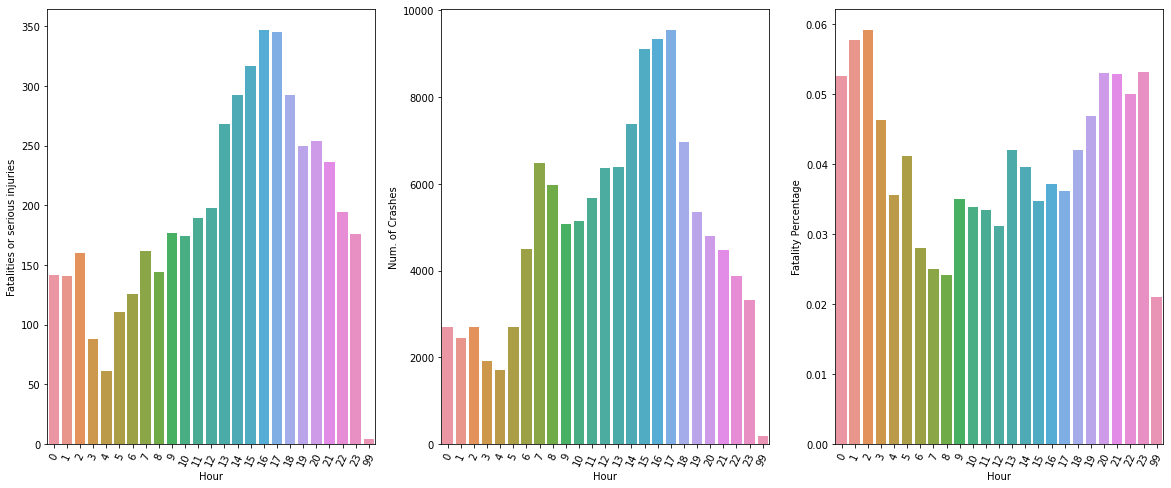

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x = 'HOUR', y = "FATAL_OR_SUSP_SERIOUS_INJ", 
              data = crash_by_time, ax = ax1)
ax1.set(xlabel = 'Hour', ylabel='Fatalities or serious injuries')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=65)


sns.barplot(x = 'HOUR', y = "CRN", 
              data = crash_by_time, ax = ax2)
ax2.set(xlabel = 'Hour', ylabel='Num. of Crashes')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=65)


ax3 = sns.barplot(x = 'HOUR', y = "fatal_to_crash", 
              data = crash_by_time, ax = ax3)
ax3.set(xlabel = 'Hour', ylabel='Fatality Percentage')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=65)

We can observe that crashes occur most frequently from around 3 pm to 6pm.  However, the highest fatality crashes occur around the midnight hours.  

## Speed Limit

We then look at the impact of road's speed limit on the crash's fatality.  For crashes that occur in locations with more than one speed limit, the mean is taken.

In [ ]:
speed_df = roadway_df[['SPEED_LIMIT','CRN']]
speed_df = speed_df.groupby(by = 'CRN').mean()
speed_df.reset_index(inplace=True)
speed_df = speed_df.merge(df_want[['FATAL_OR_SUSP_SERIOUS_INJ', 'CRN']], on = 'CRN')
speed_df

,CRN,SPEED_LIMIT,FATAL_OR_SUSP_SERIOUS_INJ
0,2018014440,25.000000,0
1,2018064060,25.000000,0
2,2018131567,35.000000,0
3,2018139845,45.000000,0
4,2019000018,30.000000,0
...,...,...,...
124100,2020051264,40.000000,0
124101,2020051728,31.666667,0
124102,2020054502,55.000000,0
124103,2020058713,40.000000,0


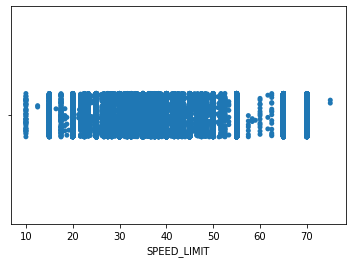

In [ ]:
sns.stripplot(x=speed_df["SPEED_LIMIT"])

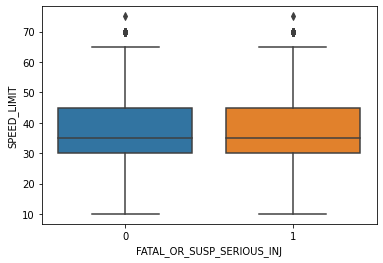

In [ ]:
sns.boxplot(x="FATAL_OR_SUSP_SERIOUS_INJ", y="SPEED_LIMIT", data=speed_df)

Looking at the plots for the distributions of speed limits, there does not seem to be a big difference in distribution between the crashes that are fatal and those that are not. However, we do think it should have some impact on fatality hence we decided to still include it in the model.

## Day of Week

Next, we group by day of week. Note that 1 = Sunday, 7 = Saturday.



In [ ]:
crash_by_day = df_want.groupby(by = 'DAY_OF_WEEK').count()[['CRN']]
crash_by_day.reset_index(inplace=True)
fatal_by_day = df_want.groupby(by = 'DAY_OF_WEEK').sum()[['FATAL_OR_SUSP_SERIOUS_INJ']]
fatal_by_day.reset_index(inplace=True)
crash_by_day = crash_by_day.merge(fatal_by_day, on = 'DAY_OF_WEEK')
crash_by_day['fatal_to_crash'] = crash_by_day['FATAL_OR_SUSP_SERIOUS_INJ']/crash_by_day['CRN']

crash_by_day

,DAY_OF_WEEK,CRN,FATAL_OR_SUSP_SERIOUS_INJ,fatal_to_crash
0,1,15452,725,0.046919
1,2,17145,612,0.035696
2,3,17970,622,0.034613
3,4,18277,644,0.035236
4,5,17780,631,0.035489
5,6,20441,775,0.037914
6,7,17040,839,0.049237


[Text(0, 0.5, 'Fatality Percentage'), Text(0.5, 0, 'DAY_OF_WEEK')]

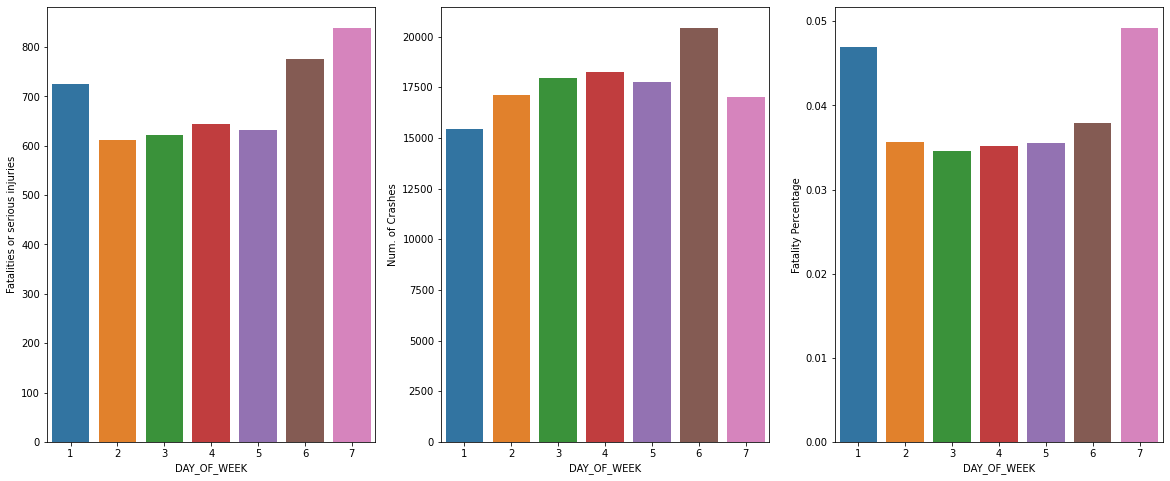

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x = 'DAY_OF_WEEK', y = "FATAL_OR_SUSP_SERIOUS_INJ", 
              data = crash_by_day, ax = ax1)
ax1.set(xlabel = 'DAY_OF_WEEK', ylabel='Fatalities or serious injuries')
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=65)


sns.barplot(x = 'DAY_OF_WEEK', y = "CRN", 
              data = crash_by_day, ax = ax2)
ax2.set(xlabel = 'DAY_OF_WEEK', ylabel='Num. of Crashes')
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=65)


ax3 = sns.barplot(x = 'DAY_OF_WEEK', y = "fatal_to_crash", 
              data = crash_by_day, ax = ax3)
ax3.set(xlabel = 'DAY_OF_WEEK', ylabel='Fatality Percentage')
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=65)

There are more fatalities on Saturday and Sunday and the fatality percentage is obviously much higher.  This makes sense as drivers on weekends may not be as accustomoed to driving as drivers on weekdays.  

Collecting the aforementioned variables into a dataframe

In [ ]:
var_brian = df_want[['CRN','WEATHER1','TIME_OF_DAY', 'DAY_OF_WEEK']]
#.merge(speed_df, on = 'CRN')
var_brian['TIME_OF_DAY'] = var_brian['TIME_OF_DAY'].apply(lambda x: str(math.floor(x/100)))
var_brian = var_brian.rename(columns={"TIME_OF_DAY": "HOUR"})
var_brian['WEATHER1'] = var_brian['WEATHER1'].apply(lambda x: str(int(x)))
var_brian['DAY_OF_WEEK'] = var_brian['DAY_OF_WEEK'].apply(lambda x: str(x))
var_brian = pd.get_dummies(var_brian, prefix=['Weather', 'Hour', 'Day'])
var_brian = var_brian.merge(speed_df, on = 'CRN')
var_brian

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CRN,Weather_1,Weather_10,Weather_2,Weather_3,Weather_4,Weather_5,Weather_6,Weather_7,Weather_8,Weather_9,Weather_98,Weather_99,Hour_0,Hour_1,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_2,Hour_20,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_99,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,SPEED_LIMIT,FATAL_OR_SUSP_SERIOUS_INJ
0,2019124876,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,65.0,1
1,2020008628,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,55.0,0
2,2019088646,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,45.0,0
3,2019086614,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,40.0,0
4,2019092437,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124100,2019085671,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22.5,0
124101,2019086135,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,25.0,0
124102,2019088504,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0
124103,2019109794,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,30.0,0


# Analyzing Safety of Road Infrastructure

In [ ]:
import seaborn as sns

In [ ]:
keys = ['CURVED_ROAD', 'ILLUMINATION_DARK', 'INTERSTATE', 'INTERSECTION', 'LANE_DEPARTURE', 'LEFT_TURN', 'LOCAL_ROAD']
crash_types = pd.DataFrame()
for item in keys:
  df = df_want.groupby(by = item).size().reset_index(name = 'crash_num')
  df_fatal = df_want.groupby(by = item).sum().reset_index()
  df = df.merge(df_fatal, on=item)
  df['fatal_percentage'] = df["FATAL_OR_SUSP_SERIOUS_INJ"]/ df['crash_num']
  df = df[['FATAL_OR_SUSP_SERIOUS_INJ', 'crash_num', 'fatal_percentage']].rename({1: item}, axis = 'index').drop(0)  
  crash_types = pd.concat([crash_types, df])

crash_types = crash_types.reset_index().rename({"index": "crash_type"}, axis = 'columns')
crash_types


,crash_type,FATAL_OR_SUSP_SERIOUS_INJ,crash_num,fatal_percentage
0,CURVED_ROAD,1212,21624,0.056049
1,ILLUMINATION_DARK,1860,40809,0.045578
2,INTERSTATE,279,11024,0.025308
3,INTERSECTION,1647,47804,0.034453
4,LANE_DEPARTURE,1951,38050,0.051275
5,LEFT_TURN,758,19294,0.039287
6,LOCAL_ROAD,2107,58461,0.036041


We decided to look at 7 different types of collisions due to the road infrastructure: accidents on curved roads, accidents with dark illumination, accidents at interstates, intersections, from lane departure, left turns and on local roads. As seen below, accidents on local roads and from lane departure tended to have the most fatal accidents. However, we had to keep in mind that the number of crashes aren't evenly distributed amongst these categories. For example, local road crashes tended to occur a lot more than interstate crashes for example. Thus, analyzing the percentage of crashes that are fatal, we saw a slightly different situation where curved roads had the highest percentage. It appears lane departures still were significant in terms of fatal accidents.  

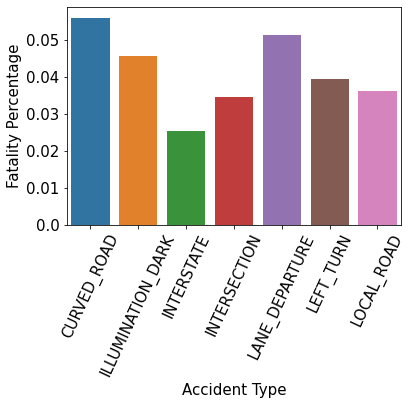

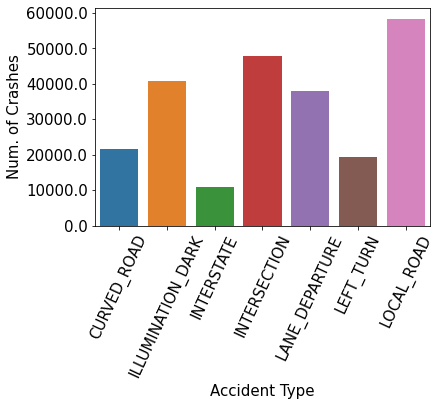

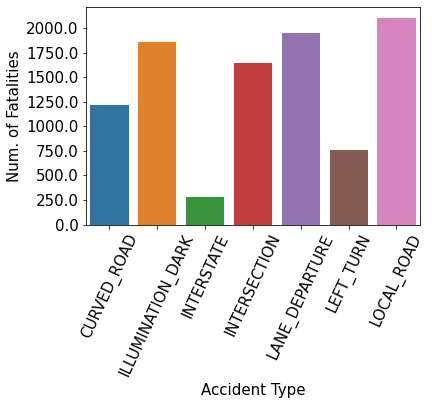

In [ ]:
ax1 = sns.barplot(x = 'crash_type', y = "fatal_percentage", 
              data = crash_types)
ax1.set(xlabel = 'Accident Type', ylabel='Fatality Percentage')
ax1.set_ylabel(ax1.get_ylabel(), fontsize=15)
ax1.set_xlabel(ax1.get_xlabel(), fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=65, fontsize = 15)
ax1.set_yticklabels(ax1.get_yticks(), size = 15)
plt.show()


ax2 = sns.barplot(x = 'crash_type', y = "crash_num", 
              data = crash_types)
ax2.set(xlabel = 'Accident Type', ylabel='Num. of Crashes')
ax2.set_ylabel(ax2.get_ylabel(), fontsize=15)
ax2.set_xlabel(ax2.get_xlabel(), fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=65, fontsize = 15)
ax2.set_yticklabels(ax2.get_yticks(), size = 15)
plt.show()


ax3 = sns.barplot(x = 'crash_type', y = "FATAL_OR_SUSP_SERIOUS_INJ", 
              data = crash_types)
ax3.set(xlabel = 'Accident Type', ylabel='Num. of Fatalities')
ax3.set_ylabel(ax3.get_ylabel(), fontsize=15)
ax3.set_xlabel(ax3.get_xlabel(), fontsize=15)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=65, fontsize = 15)
ax3.set_yticklabels(ax3.get_yticks(), size = 15)
plt.show()



In [ ]:
df_tcd = df_want[['TCD_FUNC_CD','TCD_TYPE', 'INTERSECTION']].groupby(by = ['TCD_TYPE', 'TCD_FUNC_CD', 'INTERSECTION']).size().reset_index(name = 'CRN')
#filter out crashes that didn't occur from left turn
df_tcd = df_tcd[df_tcd['INTERSECTION'] != 0]
t = {
    0: "Not Applicable",
    1: "Flashing Traffic Signal",
    2: "Traffic Signal",
    3: "Stop Sign", 
    4: "Yield Sign", 
    5: "Active RR crossing controls",
    6: "Passive RR crossing controls",
    7: "Police Officer",
    8: "Other Type",
    9: "Unknown"
}

func = {
    0: "No Controls",
    1: "Device Not Functioning",
    2: "Device Functioning Improperly",
    3: "Device Functioning Properly",
    4: "Emergency Preemptive Signal",
    9: "Unknown"
}
df_tcd['TYPE'] = df_tcd['TCD_TYPE'].map(t)
df_tcd['FUNC'] = df_tcd['TCD_FUNC_CD'].map(func)

df_tcd.sort_values(by = 'CRN', ascending=False, inplace= True)
df_tcd

,TCD_TYPE,TCD_FUNC_CD,INTERSECTION,CRN,TYPE,FUNC
17,2,3,1,17608,Traffic Signal,Device Functioning Properly
1,0,0,1,13899,Not Applicable,No Controls
26,3,3,1,13818,Stop Sign,Device Functioning Properly
34,4,3,1,645,Yield Sign,Device Functioning Properly
7,1,3,1,434,Flashing Traffic Signal,Device Functioning Properly
15,2,2,1,224,Traffic Signal,Device Functioning Improperly
24,3,2,1,221,Stop Sign,Device Functioning Improperly
29,3,9,1,217,Stop Sign,Unknown
60,8,3,1,196,Other Type,Device Functioning Properly
20,2,9,1,171,Traffic Signal,Unknown


In [ ]:
df_tcd_fatal = df_want[['TCD_FUNC_CD', 'TCD_TYPE', 'INTERSECTION','FATAL_OR_SUSP_SERIOUS_INJ']].groupby(by = ['TCD_TYPE', 'TCD_FUNC_CD', 'INTERSECTION']).sum().reset_index()
df_tcd_fatal = df_tcd_fatal[df_tcd_fatal['INTERSECTION'] != 0]

df_tcd_fatal['TYPE'] = df_tcd['TCD_TYPE'].map(t)
df_tcd_fatal['FUNC'] = df_tcd['TCD_FUNC_CD'].map(func)

df_tcd_fatal

,TCD_TYPE,TCD_FUNC_CD,INTERSECTION,FATAL_OR_SUSP_SERIOUS_INJ,TYPE,FUNC
1,0,0,1,493,Not Applicable,No Controls
3,1,1,1,0,Flashing Traffic Signal,Device Not Functioning
5,1,2,1,0,Flashing Traffic Signal,Device Functioning Improperly
7,1,3,1,25,Flashing Traffic Signal,Device Functioning Properly
9,1,4,1,0,Flashing Traffic Signal,Emergency Preemptive Signal
11,1,9,1,0,Flashing Traffic Signal,Unknown
13,2,1,1,2,Traffic Signal,Device Not Functioning
15,2,2,1,6,Traffic Signal,Device Functioning Improperly
17,2,3,1,568,Traffic Signal,Device Functioning Properly
18,2,4,1,0,Traffic Signal,Emergency Preemptive Signal


In [ ]:
intersection_crash = df_tcd.merge(df_tcd_fatal, on = ['TYPE', 'FUNC'])
intersection_crash['fatal_percentage'] = intersection_crash['FATAL_OR_SUSP_SERIOUS_INJ']/intersection_crash['CRN']
#clean the data so that we aren't looking at 0 fatal_to_crash counts
intersection_crash = intersection_crash[intersection_crash['FATAL_OR_SUSP_SERIOUS_INJ'] > 0]
intersection_crash = intersection_crash[['CRN', 'TYPE', 'FUNC', 'FATAL_OR_SUSP_SERIOUS_INJ', 'fatal_percentage']].sort_values(by = 'fatal_percentage', ascending=False)
intersection_crash = intersection_crash[(intersection_crash['TYPE'] != 'Other Type') & (intersection_crash['FUNC'] != 'Device Not Functioning')]
intersection_crash

,CRN,TYPE,FUNC,FATAL_OR_SUSP_SERIOUS_INJ,fatal_percentage
14,21,Passive RR crossing controls,Device Functioning Properly,4,0.190476
15,19,Active RR crossing controls,Device Functioning Properly,3,0.157895
10,78,Unknown,Unknown,5,0.064103
4,434,Flashing Traffic Signal,Device Functioning Properly,25,0.057604
9,171,Traffic Signal,Unknown,7,0.040936
7,217,Stop Sign,Unknown,8,0.036866
2,13818,Stop Sign,Device Functioning Properly,498,0.036040
1,13899,Not Applicable,No Controls,493,0.035470
0,17608,Traffic Signal,Device Functioning Properly,568,0.032258
6,221,Stop Sign,Device Functioning Improperly,6,0.027149


We first analyzed crashes at intersections. The provided dataset also included flags indicating what kind of traffic controls were present at the intersection. Thus, we found it interesting to see if the functionality of these traffic controls had any impact on the fatality of the crashes. Grouping the intersection crashes based on these traffic control factors and plotting them on a heatmap, we see that the highest number of fatal crashes occured at intersections with traffic signals or stop signs. However, keeping in mind that there tend to be more intersections with traffic signals or stop signs than crossing controls for example, we also analyzed these factors against the percentage of fatal crashes over total crashes. From this heatmap, we saw that the highest percentage of fatal crashes occured at crossing roads. 

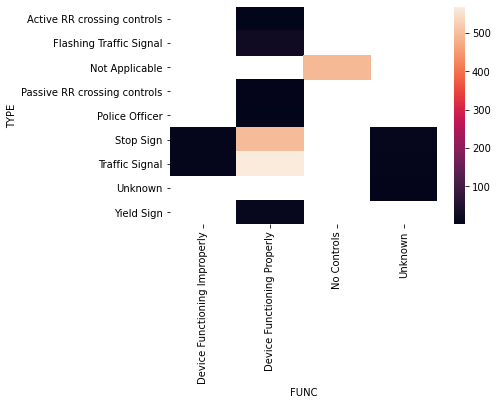

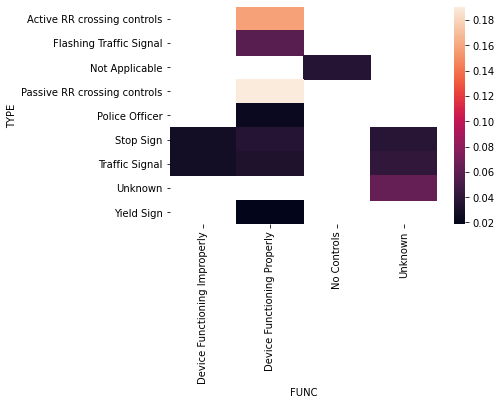

In [ ]:
intersection_count = intersection_crash.pivot("TYPE", 'FUNC', "FATAL_OR_SUSP_SERIOUS_INJ")
ax1 = sns.heatmap(intersection_count)


plt.show()

intersection_percent = intersection_crash.pivot("TYPE", 'FUNC', "fatal_percentage")
ax1 = sns.heatmap(intersection_percent)

Notice how curved roads had the highest fatality to count percentage. This is a sign that curved roads are quite dangerous. Let's see how factors such as hour of day and speed related with curved roads. 

In [ ]:
df_curved = df_want.groupby(by = ['HOUR_OF_DAY', 'CURVED_ROAD']).size().reset_index(name = "crash_count")
df_curved

,HOUR_OF_DAY,CURVED_ROAD,crash_count
0,0,0,2054
1,0,1,650
2,1,0,1851
3,1,1,594
4,2,0,2018
5,2,1,687
6,3,0,1430
7,3,1,474
8,4,0,1274
9,4,1,438


In [ ]:
df_curved = df_curved[(df_curved['HOUR_OF_DAY'] < 24) & (df_curved['CURVED_ROAD'] != 0)] 
df_curved_fatal = df_want[['HOUR_OF_DAY', 'CURVED_ROAD', "FATAL_OR_SUSP_SERIOUS_INJ"]].groupby(by = ['HOUR_OF_DAY', 'CURVED_ROAD']).sum().reset_index()
df_curved_fatal = df_curved_fatal[df_curved_fatal['CURVED_ROAD'] != 0]
df_curved = df_curved.merge(df_curved_fatal, on='HOUR_OF_DAY')

In [ ]:
df_curved['fatal_percentage'] = df_curved["FATAL_OR_SUSP_SERIOUS_INJ"]/df_curved['crash_count']
df_curved

,HOUR_OF_DAY,CURVED_ROAD_x,crash_count,CURVED_ROAD_y,FATAL_OR_SUSP_SERIOUS_INJ,fatal_percentage
0,0,1,650,1,44,0.067692
1,1,1,594,1,45,0.075758
2,2,1,687,1,54,0.078603
3,3,1,474,1,32,0.067511
4,4,1,438,1,20,0.045662
5,5,1,598,1,23,0.038462
6,6,1,906,1,31,0.034216
7,7,1,1214,1,50,0.041186
8,8,1,1061,1,35,0.032988
9,9,1,916,1,47,0.051310


Since curved roads seem to play a significant role in the percentage of fatal crashes, let's analyze some factors as to why this may be the case. First seeing the distribution of fatal crashes at curved roads throughout the day, we see that a significant amount of fatal crashes occur towards the late hours, 6 pm est, most notably. This could make sense due to the fact that at this time most people are coming home from work, going out for dinner and the higher traffic as well as lack of illumination may attribute to more fatal crashes at dangerous area like curved roads. 

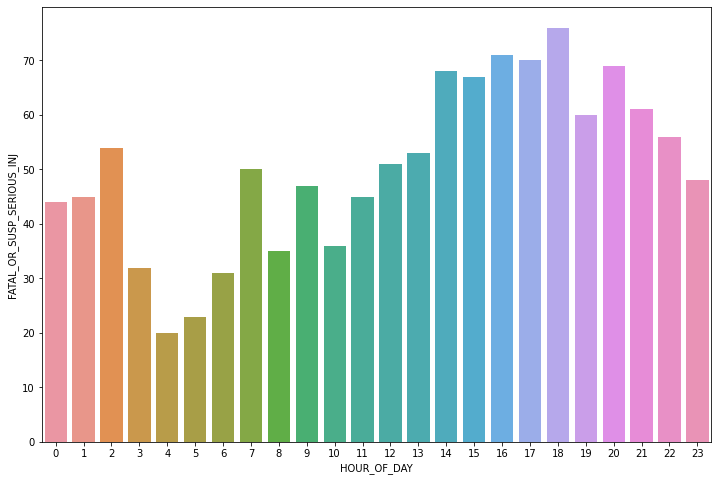

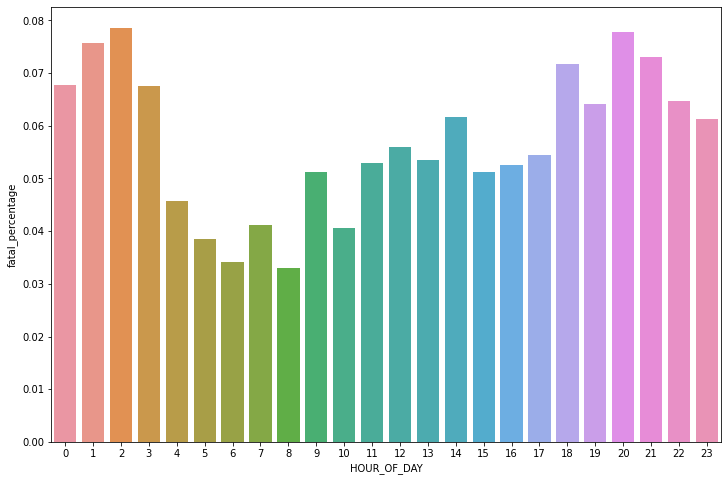

In [ ]:
plt.figure(figsize=(12, 8))
p = sns.barplot(x = 'HOUR_OF_DAY', y = "FATAL_OR_SUSP_SERIOUS_INJ", data=df_curved)

# get label text
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()

plt.show()

plt.figure(figsize=(12, 8))
p = sns.barplot(x = 'HOUR_OF_DAY', y = 'fatal_percentage', data=df_curved)
# get label text
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.show()


In [ ]:
#clean data so that absurd speeds are filtered out 
travel_spd = vehicle_df[['CRN','TRAVEL_SPD']].groupby(by = 'CRN').mean()
travel_spd.reset_index(inplace=True)
df_want = df_want.merge(travel_spd, on = 'CRN')
df_filter = df_want[(df_want['TRAVEL_SPD'] > 0) & (df_want['TRAVEL_SPD'] <= 120) & (df_want['CURVED_ROAD'] != 0)]
df_speed = df_filter.groupby(by = ['TRAVEL_SPD', 'CURVED_ROAD']).size().reset_index(name = 'count')

df_speed_fatal = df_filter[['TRAVEL_SPD', 'CURVED_ROAD', "FATAL_OR_SUSP_SERIOUS_INJ"]].groupby(by = ['TRAVEL_SPD', 'CURVED_ROAD']).sum().reset_index()
df_speed_fatal = df_speed_fatal[df_speed_fatal['CURVED_ROAD'] != 0]
df_speed = df_speed.merge(df_speed_fatal, on='TRAVEL_SPD')
df_speed['fatal_percentage'] = df_speed["FATAL_OR_SUSP_SERIOUS_INJ"]/df_speed['count']
df_speed = df_speed[(df_speed["FATAL_OR_SUSP_SERIOUS_INJ"] != 0) & (df_speed["fatal_percentage"] < 1)]
df_speed

,TRAVEL_SPD,CURVED_ROAD_x,count,CURVED_ROAD_y,FATAL_OR_SUSP_SERIOUS_INJ,fatal_percentage
0,1.000000,1,8,1,1,0.125000
10,5.000000,1,138,1,3,0.021739
24,10.000000,1,222,1,2,0.009009
27,11.250000,1,3,1,1,0.333333
29,11.666667,1,28,1,1,0.035714
31,12.500000,1,156,1,1,0.006410
38,15.000000,1,337,1,14,0.041543
45,17.500000,1,201,1,6,0.029851
47,18.333333,1,14,1,2,0.142857
53,20.000000,1,508,1,9,0.017717


It seems that most fatal curved road accidents occur at high speeds and during late hours. One of our other significant seeming variables was dark illumination. Given most of the curved road accidents occur at late hours, there's a possibility that dark illumination and curved crashes are related. 

In [ ]:
#clean data so that absurd speeds are filtered out 
df_lane = df_want.groupby(by = ['HOUR_OF_DAY', 'LANE_DEPARTURE']).size().reset_index(name = "crash_count")
df_lane

df_lane = df_lane[(df_lane['HOUR_OF_DAY'] < 24) & (df_lane['LANE_DEPARTURE'] != 0)] 
df_lane_fatal = df_want[['HOUR_OF_DAY', 'LANE_DEPARTURE', "FATAL_OR_SUSP_SERIOUS_INJ"]].groupby(by = ['HOUR_OF_DAY', 'LANE_DEPARTURE']).sum().reset_index()
df_lane_fatal = df_lane_fatal[df_lane_fatal['LANE_DEPARTURE'] != 0]
df_lane = df_lane.merge(df_lane_fatal, on='HOUR_OF_DAY')
df_lane['fatal_percentage'] = df_lane["FATAL_OR_SUSP_SERIOUS_INJ"]/df_lane['crash_count']
df_lane

,HOUR_OF_DAY,LANE_DEPARTURE_x,crash_count,LANE_DEPARTURE_y,FATAL_OR_SUSP_SERIOUS_INJ,fatal_percentage
0,0,1,1321,1,73,0.055261
1,1,1,1244,1,86,0.069132
2,2,1,1382,1,93,0.067294
3,3,1,1070,1,60,0.056075
4,4,1,915,1,38,0.041530
5,5,1,1207,1,52,0.043082
6,6,1,1595,1,46,0.028840
7,7,1,1979,1,72,0.036382
8,8,1,1741,1,69,0.039632
9,9,1,1532,1,64,0.041775


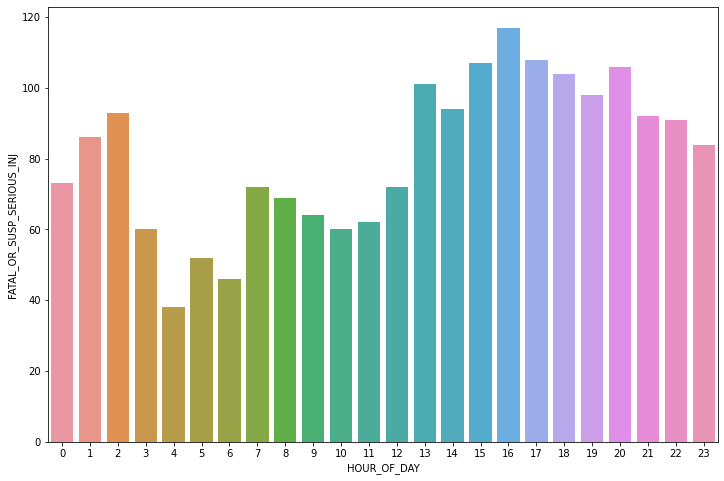

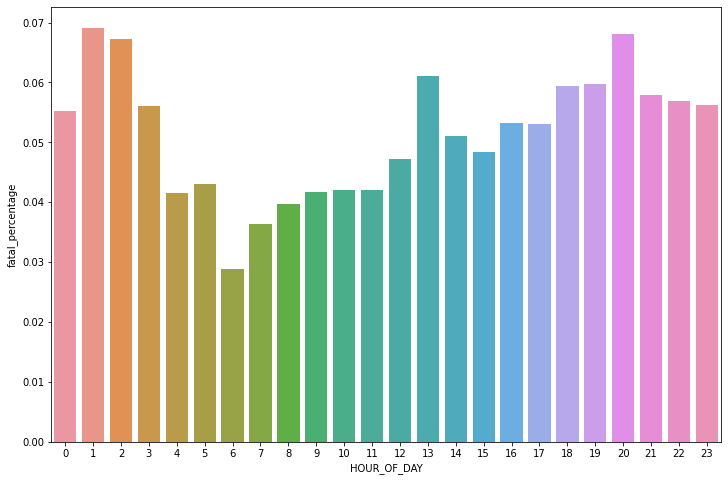

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'HOUR_OF_DAY', y = "FATAL_OR_SUSP_SERIOUS_INJ", data=df_lane)
# get label text
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x = 'HOUR_OF_DAY', y = 'fatal_percentage', data=df_lane)
# get label text
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
plt.show()
plt.show()

#Analysis of Driver Faults

In [ ]:
##############################################################
from pandasql import sqldf
import seaborn as sb
df_alc = df_all[['CRN', 'DEC_LAT', 'DEC_LONG', 'LOCATION_TYPE', 'URBAN_RURAL', 'ALCOHOL_RELATED', 'DRINKING_DRIVER', 'FATAL', 'FATAL_OR_SUSP_SERIOUS_INJ']]
df_sleep = df_all[['CRN','DAY_OF_WEEK','DEC_LAT', 'DEC_LONG', 'HOUR_OF_DAY', 'LOCATION_TYPE', 'TIME_OF_DAY', 'URBAN_RURAL', 'AGGRESSIVE_DRIVING', 'CELL_PHONE', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'FATAL', 'FATAL_OR_SUSP_SERIOUS_INJ', 'FATIGUE_ASLEEP', 'RUNNING_RED_LT', 'RUNNING_STOP_SIGN', 'SPEEDING', 'SPEEDING_RELATED']]

In [ ]:
alc_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.DRINKING_DRIVER, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_alc A
    INNER JOIN (SELECT LOCATION_TYPE, DRINKING_DRIVER, COUNT(DISTINCT CRN) AS CASES FROM df_alc GROUP BY LOCATION_TYPE, DRINKING_DRIVER) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.DRINKING_DRIVER = B.DRINKING_DRIVER
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.DRINKING_DRIVER, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
alc_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,DRINKING_DRIVER,COUNT(DISTINCT CRN),pct
0,0,1,0,3612,3
1,0,1,1,847,10
2,1,1,0,12,3
3,1,1,1,5,16
4,2,1,0,81,2
5,2,1,1,22,11
6,3,1,0,53,3
7,3,1,1,11,9
8,4,1,0,1,0
9,5,1,0,1,2


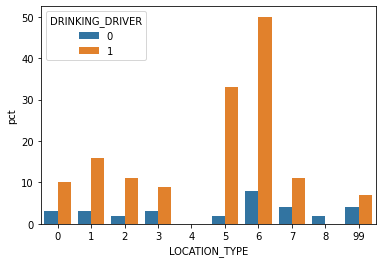

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="DRINKING_DRIVER", data=alc_table)

In [ ]:
alc_table2 = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.ALCOHOL_RELATED, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_alc A
    INNER JOIN (SELECT LOCATION_TYPE, ALCOHOL_RELATED, COUNT(DISTINCT CRN) AS CASES FROM df_alc GROUP BY LOCATION_TYPE, ALCOHOL_RELATED) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.ALCOHOL_RELATED = B.ALCOHOL_RELATED
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.ALCOHOL_RELATED, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
alc_table2

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,ALCOHOL_RELATED,COUNT(DISTINCT CRN),pct
0,0,1,0,3534,3
1,0,1,1,925,10
2,1,1,0,12,3
3,1,1,1,5,15
4,2,1,0,81,2
5,2,1,1,22,11
6,3,1,0,52,3
7,3,1,1,12,9
8,4,1,0,1,0
9,5,1,0,1,2


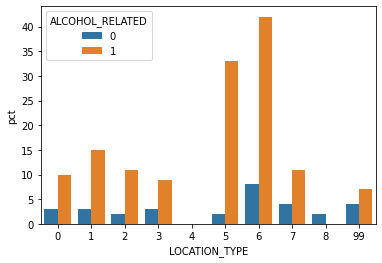

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="ALCOHOL_RELATED", data=alc_table2)

In [ ]:
#Kevin
#Take locations of crashes, urban vs rural and location of bars + alcoholic driving to see if those relate

#Fatigue of Driver + Time of Day + Location 
sleep_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.FATIGUE_ASLEEP, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, FATIGUE_ASLEEP, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, FATIGUE_ASLEEP) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.FATIGUE_ASLEEP = B.FATIGUE_ASLEEP
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.FATIGUE_ASLEEP, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
sleep_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,FATIGUE_ASLEEP,COUNT(DISTINCT CRN),pct
0,0,1,0,4352,3
1,0,1,1,107,4
2,1,1,0,16,4
3,1,1,1,1,12
4,2,1,0,102,2
5,2,1,1,1,2
6,3,1,0,64,3
7,4,1,0,1,0
8,5,1,0,2,3
9,6,1,0,17,10


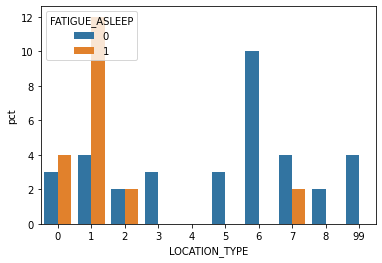

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="FATIGUE_ASLEEP", data=sleep_table)

In [ ]:
cellphone_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.CELL_PHONE, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, CELL_PHONE, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, CELL_PHONE) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.CELL_PHONE = B.CELL_PHONE
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.CELL_PHONE, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
cellphone_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,CELL_PHONE,COUNT(DISTINCT CRN),pct
0,0,1,0,4421,3
1,0,1,1,38,3
2,1,1,0,17,4
3,2,1,0,103,3
4,3,1,0,64,3
5,4,1,0,1,0
6,5,1,0,2,3
7,6,1,0,17,9
8,7,1,0,244,4
9,7,1,1,1,4


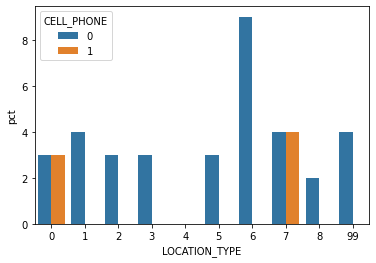

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="CELL_PHONE", data=cellphone_table)

In [ ]:
aggression_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.AGGRESSIVE_DRIVING, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, AGGRESSIVE_DRIVING, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, AGGRESSIVE_DRIVING) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.AGGRESSIVE_DRIVING = B.AGGRESSIVE_DRIVING
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.AGGRESSIVE_DRIVING, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
aggression_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,AGGRESSIVE_DRIVING,COUNT(DISTINCT CRN),pct
0,0,1,0,2118,4
1,0,1,1,2341,3
2,1,1,0,8,3
3,1,1,1,9,5
4,2,1,0,33,3
5,2,1,1,70,2
6,3,1,0,29,3
7,3,1,1,35,4
8,4,1,1,1,1
9,5,1,0,2,6


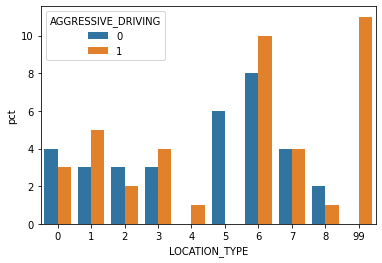

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="AGGRESSIVE_DRIVING", data=aggression_table)

In [ ]:
drug_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.DRUG_RELATED, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, DRUG_RELATED, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, DRUG_RELATED) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.DRUG_RELATED = B.DRUG_RELATED
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.DRUG_RELATED, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
drug_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,DRUG_RELATED,COUNT(DISTINCT CRN),pct
0,0,1,0,4076,3
1,0,1,1,383,11
2,1,1,0,16,4
3,1,1,1,1,8
4,2,1,0,93,2
5,2,1,1,10,12
6,3,1,0,59,3
7,3,1,1,5,12
8,4,1,0,1,0
9,5,1,0,2,3


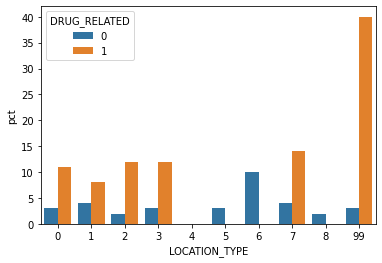

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="DRUG_RELATED", data=drug_table)

In [ ]:
distracted_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.DISTRACTED, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, DISTRACTED, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, DISTRACTED) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.DISTRACTED = B.DISTRACTED
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.DISTRACTED, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
distracted_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,DISTRACTED,COUNT(DISTINCT CRN),pct
0,0,1,0,4140,4
1,0,1,1,319,2
2,1,1,0,16,4
3,1,1,1,1,1
4,2,1,0,99,3
5,2,1,1,4,1
6,3,1,0,62,4
7,3,1,1,2,1
8,4,1,0,1,0
9,5,1,0,2,4


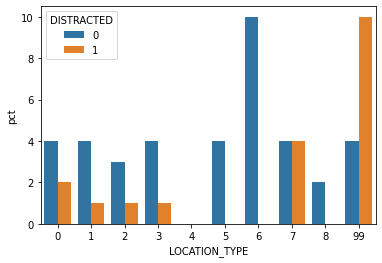

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="DISTRACTED", data=distracted_table)

In [ ]:
speeding_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.SPEEDING, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, SPEEDING, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, SPEEDING) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.SPEEDING = B.SPEEDING
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.SPEEDING, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
speeding_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,SPEEDING,COUNT(DISTINCT CRN),pct
0,0,1,0,4021,3
1,0,1,1,438,12
2,1,1,0,15,4
3,1,1,1,2,13
4,2,1,0,93,2
5,2,1,1,10,9
6,3,1,0,55,3
7,3,1,1,9,17
8,4,1,1,1,25
9,5,1,0,2,3


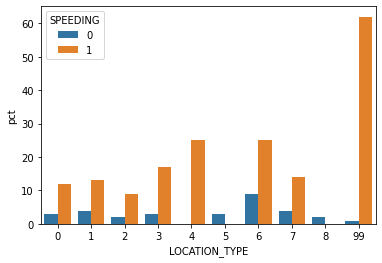

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="SPEEDING", data=speeding_table)

In [ ]:
redlight_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.RUNNING_RED_LT, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, RUNNING_RED_LT, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, RUNNING_RED_LT) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.RUNNING_RED_LT = B.RUNNING_RED_LT
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.RUNNING_RED_LT, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
redlight_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,RUNNING_RED_LT,COUNT(DISTINCT CRN),pct
0,0,1,0,4334,3
1,0,1,1,125,3
2,1,1,0,17,4
3,2,1,0,99,2
4,2,1,1,4,2
5,3,1,0,64,3
6,4,1,0,1,0
7,5,1,0,2,3
8,6,1,0,16,9
9,6,1,1,1,12


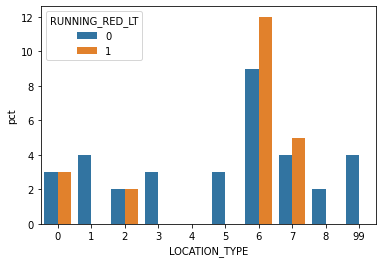

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="RUNNING_RED_LT", data=redlight_table)

In [ ]:
stopsign_table = sqldf('''
  SELECT A.LOCATION_TYPE, A.FATAL_OR_SUSP_SERIOUS_INJ, A.RUNNING_STOP_SIGN, COUNT(DISTINCT CRN), (100 * COUNT(DISTINCT CRN) / CASES) pct
  FROM df_sleep A
    INNER JOIN (SELECT LOCATION_TYPE, RUNNING_STOP_SIGN, COUNT(DISTINCT CRN) AS CASES FROM df_sleep GROUP BY LOCATION_TYPE, RUNNING_STOP_SIGN) AS B
    ON A.LOCATION_TYPE = B.LOCATION_TYPE AND A.RUNNING_STOP_SIGN = B.RUNNING_STOP_SIGN
  WHERE A.FATAL_OR_SUSP_SERIOUS_INJ = 1
  GROUP BY A.LOCATION_TYPE, A.RUNNING_STOP_SIGN, A.FATAL_OR_SUSP_SERIOUS_INJ 
  ''')
stopsign_table

,LOCATION_TYPE,FATAL_OR_SUSP_SERIOUS_INJ,RUNNING_STOP_SIGN,COUNT(DISTINCT CRN),pct
0,0,1,0,4317,3
1,0,1,1,142,4
2,1,1,0,16,4
3,1,1,1,1,12
4,2,1,0,97,2
5,2,1,1,6,10
6,3,1,0,64,3
7,4,1,0,1,0
8,5,1,0,2,3
9,6,1,0,17,10


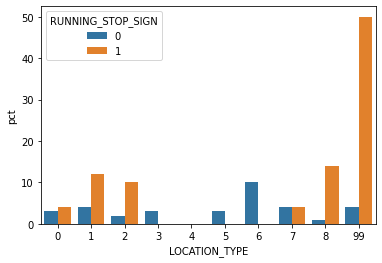

In [ ]:
sb.barplot(x="LOCATION_TYPE", y="pct", hue="RUNNING_STOP_SIGN", data=stopsign_table)

#Data Pre-Processing




In [ ]:
var_roads_driver = df_want[['CRN', 'CURVED_ROAD', 'ILLUMINATION_DARK', 'INTERSTATE', 'LANE_DEPARTURE', 'LEFT_TURN', 'LOCAL_ROAD', 'DRUG_RELATED', 'AGGRESSIVE_DRIVING', 'CELL_PHONE','FATIGUE_ASLEEP', 'DRINKING_DRIVER']]
var_roads_driver
#drop any na values (potentially add TCD and TCD_FUNC_CD)
data_2019 = var_roads_driver.merge(var_brian, on='CRN').dropna()
data_2019 = data_2019.drop(columns=['Weather_1','Weather_2','Weather_4','Weather_6','Weather_8','Weather_98', 'Weather_99', 'Hour_99'])

# Train and Test Datasets

In [ ]:
crash_2015_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/CRASH_2015.csv") 
crash_2016_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/CRASH_2016.csv") 
crash_2017_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/CRASH_2017.csv") 
crash_2018_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/CRASH_2018.csv") 

flag_2015_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/FLAG_2015.csv") 
flag_2016_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/FLAG_2016.csv") 
flag_2017_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/FLAG_2017.csv") 
flag_2018_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/FLAG_2018.csv") 

roadway_2015_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/ROADWAY_2015.CSV") 
roadway_2016_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/ROADWAY_2016.CSV") 
roadway_2017_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/ROADWAY_2017.CSV") 
roadway_2018_df = pd.read_csv("/content/drive/MyDrive/Crash_Data/ROADWAY_2018.CSV") 



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dfs_2015 = crash_2015_df.merge(flag_2015_df, on = ['CRN']) 
dfs_2016 = crash_2016_df.merge(flag_2016_df, on = ['CRN'])
dfs_2017 = crash_2017_df.merge(flag_2017_df, on = ['CRN'])
dfs_2018 = crash_2018_df.merge(flag_2018_df, on = ['CRN'])

df_train_all = dfs_2015.append(dfs_2016).append(dfs_2017).append(dfs_2018)
df_train = df_train_all[['FATAL_OR_SUSP_SERIOUS_INJ','CRN', 'WEATHER1','TIME_OF_DAY', 'DAY_OF_WEEK', 'CURVED_ROAD', 'ILLUMINATION_DARK', 'INTERSTATE', 'LANE_DEPARTURE', 'LEFT_TURN', 'LOCAL_ROAD', 'DRUG_RELATED', 'AGGRESSIVE_DRIVING', 'CELL_PHONE','FATIGUE_ASLEEP', 'DRINKING_DRIVER']]
df_train = df_train.dropna()

In [ ]:
df_train['TIME_OF_DAY'] = df_train['TIME_OF_DAY'].apply(lambda x: str(math.floor(x/100)))
df_train = df_train.rename(columns={"TIME_OF_DAY": "HOUR"})
df_train['WEATHER1'] = df_train['WEATHER1'].apply(lambda x: str(int(x)))
df_train['DAY_OF_WEEK'] = df_train['DAY_OF_WEEK'].apply(lambda x: str(x))
df_train = pd.get_dummies(df_train, prefix=['Weather', 'Hour', 'Day'])
df_train = df_train.drop(columns=['Weather_98', 'Weather_99', 'Hour_99'])
speed_all = roadway_2015_df[['CRN','SPEED_LIMIT']].append(roadway_2016_df[['CRN','SPEED_LIMIT']]).append(roadway_2017_df[['CRN','SPEED_LIMIT']]).append(roadway_2018_df[['CRN','SPEED_LIMIT']])
speed_all = speed_all.groupby(by = 'CRN').mean()
speed_all.reset_index(inplace=True)
df_train = df_train.merge(speed_all, on = ["CRN"],  how='inner')
df_train = df_train.dropna()
df_train

,FATAL_OR_SUSP_SERIOUS_INJ,CRN,CURVED_ROAD,ILLUMINATION_DARK,INTERSTATE,LANE_DEPARTURE,LEFT_TURN,LOCAL_ROAD,DRUG_RELATED,AGGRESSIVE_DRIVING,CELL_PHONE,FATIGUE_ASLEEP,DRINKING_DRIVER,Weather_10,Weather_3,Weather_5,Weather_7,Weather_9,Hour_0,Hour_1,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_2,Hour_20,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,SPEED_LIMIT
0,0,2014077802,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25.0
1,0,2014083442,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,55.0
2,0,2015000005,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,35.0
3,0,2015000010,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20.0
4,0,2015000013,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513950,0,2019097703,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,25.0
513951,0,2019097730,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,25.0
513952,0,2019097731,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,55.0
513953,0,2019098199,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.0


In [ ]:
from sklearn.model_selection import train_test_split
df_total = df_train.append(data_2019)
X = df_total.drop(columns=['FATAL_OR_SUSP_SERIOUS_INJ', 'CRN'])
Y = df_total['FATAL_OR_SUSP_SERIOUS_INJ']
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
[x_train_3.shape, y_train_3.shape, x_test_3.shape, y_test_3.shape]

[(505392, 48), (505392,), (126348, 48), (126348,)]

Our training and testing data spans from 2015 to 2019. However, notice that the dataset is extremely imbalanced, with most of the class leaning towards a non-fatal crash. Thus, we must balance this dataset in order to ensure our models can produce useful results. 

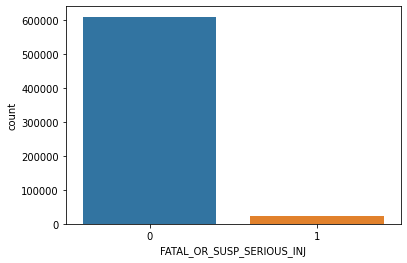

In [ ]:
sns.countplot(x = 'FATAL_OR_SUSP_SERIOUS_INJ', data = df_total)


We used a random over sampler to address this imbalance. Essentially, we randomly picked the minority class (fatal instances) with replacement in order to ensure we had more counts of the minority class than was present in the original dataset. 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros_3 = RandomOverSampler()
x_ros_3, y_ros_3 = ros_3.fit_resample(x_train_3, y_train_3)

print('The number of 0s in the class is: ', len(np.where(y_ros_3 == 0)[0]))
print('The number of 1s in the class is: ', len(np.where(y_ros_3 == 1)[0]))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of 0s in the class is:  487433
The number of 1s in the class is:  487433


#Modeling 

In [ ]:
#first we declare the packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#MCA

In [ ]:
!pip install prince

In [ ]:
import prince
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection

In [ ]:
df_mca = df_total.drop(columns = ['CRN', 'SPEED_LIMIT'])
mca = prince.MCA(n_components=2, n_iter = 3, copy=True, check_input = True, engine='auto', random_state=42)
crash_mca = mca.fit(df_mca)
mca_crash = mca.transform(df_mca)
print(mca_crash)

               0         1
0       0.734167 -0.363145
1      -0.043029  0.658374
2       0.693425 -0.000822
3       0.459946 -0.635728
4       1.171660  0.072731
...          ...       ...
124099 -0.820196 -0.217879
124100 -0.031121  0.293065
124101 -0.236177 -0.451766
124103  1.139378  0.166563
124104 -0.206983  0.118584

[631740 rows x 2 columns]


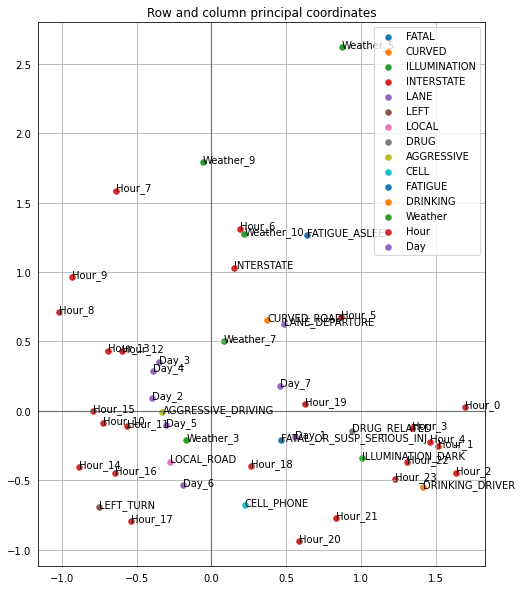

In [ ]:
try: ax = crash_mca.plot_coordinates(
        X=df_mca,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
except ZeroDivisionError:
  print('')



#Chi-Squared Test

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


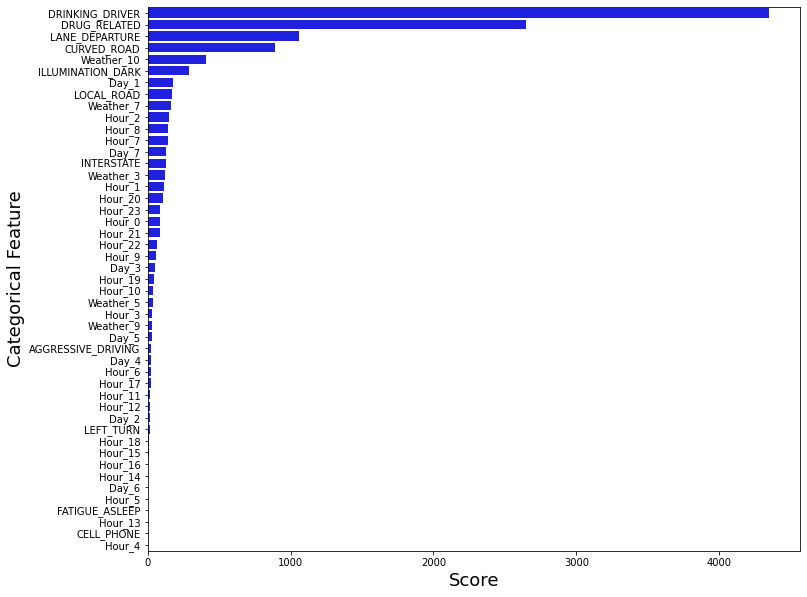

In [ ]:
X_mca = df_mca.drop(columns = ['FATAL_OR_SUSP_SERIOUS_INJ'])
Y_mca = df_mca['FATAL_OR_SUSP_SERIOUS_INJ']

# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X_mca, Y_mca)
# print feature scores

# plot the scores
datset = pd.DataFrame()
datset['feature'] = X_mca.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.barplot(datset['scores'], datset['feature'], color='blue', ax=ax)
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
#MCA selected subset of training data

X_mca = df_total[['Day_7', 'INTERSTATE', 'Weather_3','DRINKING_DRIVER', 'DRUG_RELATED', 'LANE_DEPARTURE', 'CURVED_ROAD', 'Weather_10', 'ILLUMINATION_DARK', 'Day_1', 'LOCAL_ROAD', 'Weather_7', 'SPEED_LIMIT']]
Y_mca = df_total['FATAL_OR_SUSP_SERIOUS_INJ']
x_train_mca, x_test_mca, y_train_mca, y_test_mca = train_test_split(X_mca, Y_mca, test_size = 0.2, random_state=42)
ros_mca = RandomOverSampler()
x_ros_mca, y_ros_mca = ros_mca.fit_resample(x_train_mca, y_train_mca)

print('The number of 0s in the class is: ', len(np.where(y_ros_mca == 0)[0]))
print('The number of 1s in the class is: ', len(np.where(y_ros_mca == 1)[0]))

The number of 0s in the class is:  487433
The number of 1s in the class is:  487433


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Logistic Regression 

In [ ]:
import statsmodels.api as sm 
log_reg = sm.Logit(y_ros_mca, x_ros_mca).fit() 
print(log_reg.summary()) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.656917
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               974866
Model:                          Logit   Df Residuals:                   974853
Method:                           MLE   Df Model:                           12
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.05227
Time:                        01:44:31   Log-Likelihood:            -6.4041e+05
converged:                       True   LL-Null:                   -6.7573e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1541      0.006     25.985      0.000       0.142       0.166
x2            -0.4601      0.

In [ ]:
logit_pred = log_reg.predict(x_test_mca)
logit_pred = logit_pred.apply(lambda x: 0 if x < 0.5 else 1)

In [ ]:
print("Test Mean Squared Error is: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test_mca, logit_pred))))
print("Test Accuracy: {:.3f}".format(metrics.accuracy_score(y_test_mca, logit_pred)))
print('The AUC score is: ', metrics.roc_auc_score(y_test_mca, logit_pred))

print(metrics.classification_report(y_test_mca, logit_pred))


Test Mean Squared Error is: 0.544
Test Accuracy: 0.704
The AUC score is:  0.6020757337010044
              precision    recall  f1-score   support

           0       0.97      0.71      0.82    121848
           1       0.06      0.49      0.11      4500

    accuracy                           0.70    126348
   macro avg       0.52      0.60      0.46    126348
weighted avg       0.94      0.70      0.80    126348



[[86693 35155]
 [ 2283  2217]]


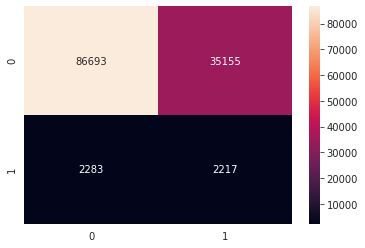

In [ ]:
logit_matrix = metrics.confusion_matrix(y_test_mca, logit_pred)
print(logit_matrix)

sns.heatmap(logit_matrix, annot=True,fmt='d')

#Decision Tree

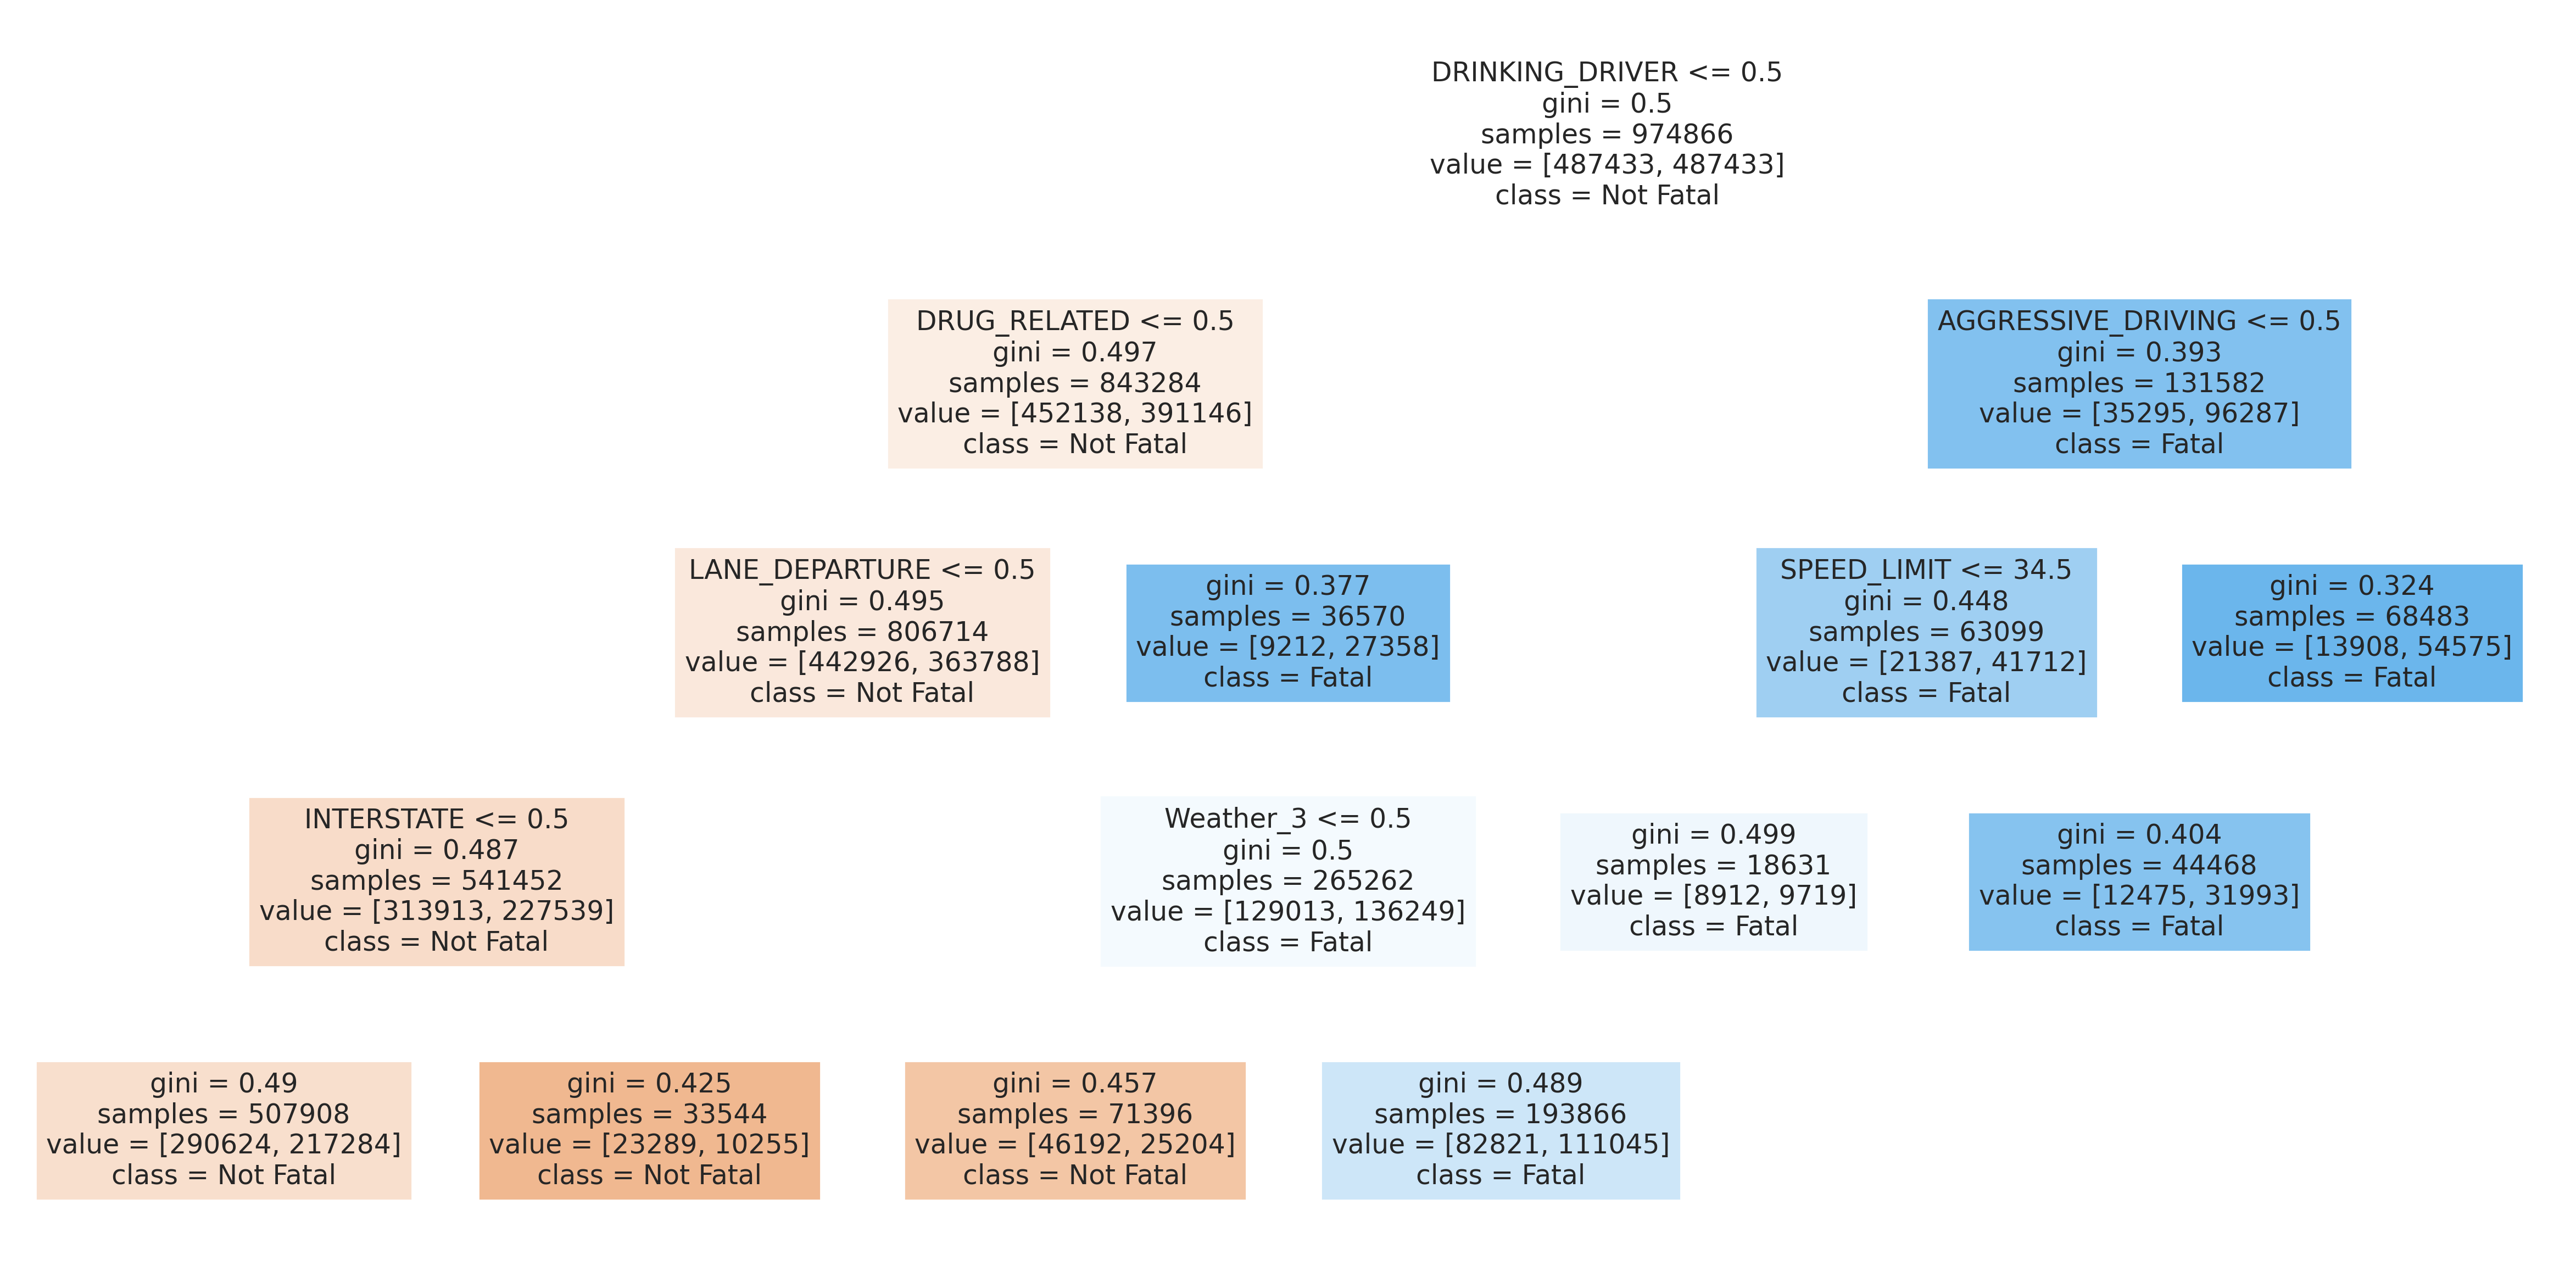

Test Accuracy: 72.7%


In [ ]:
from sklearn import tree
regtree = tree.DecisionTreeClassifier(max_leaf_nodes = 8, random_state = 1940)
regtree = regtree.fit(x_ros_3, y_ros_3)
fig = plt.figure(num = None, figsize=(30, 15), dpi = 200, facecolor = 'w', edgecolor = 'b')
tree.plot_tree(regtree, filled=True, feature_names=x_train_3.columns, class_names = ['Not Fatal','Fatal'])
plt.show()

prediction = regtree.predict(x_test_3)
accuracy = metrics.accuracy_score(prediction,y_test_3)
print("Test Accuracy: %.1f%%"% (accuracy*100))

In [ ]:
print("Test Mean Squared Error is: {:.3f}".format(np.sqrt(metrics.mean_squared_error(y_test_3, prediction))))
print(metrics.classification_report(y_test_3, prediction))
print('The AUC score is: ', metrics.roc_auc_score(y_test_3, prediction))

Test Mean Squared Error is: 0.522
              precision    recall  f1-score   support

           0       0.97      0.74      0.84    121848
           1       0.06      0.47      0.11      4500

    accuracy                           0.73    126348
   macro avg       0.52      0.60      0.47    126348
weighted avg       0.94      0.73      0.81    126348

The AUC score is:  0.6031506685925634


While this decision tree helps us visualize the model's splits of features, decision trees are often perceptible to overfitting. Thus, we choose to create a random forest to alleviate this issue. 

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#ran depths of 50, 120 and 200 but 120 ended up being the best
#ran estimators of 100, 200, 300, 350 and 350 ended up being the best
clf = RandomForestClassifier(random_state = 1)

model_params = {
    'max_depth':[120],
    'n_estimators': [350]
}

g = RandomizedSearchCV(clf, model_params, cv = 3, n_jobs = -1)
model = g.fit(x_ros_3, y_ros_3)
print(model.best_estimator_.get_params())


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 120, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 350, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [ ]:
rf = RandomForestClassifier(max_depth = 120, n_estimators = 350)
rf.fit(x_ros_3, y_ros_3)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=120, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy is:  0.787412543134834
Mean Squared Error is: 0.4610720733954357
[[98404 23444]
 [ 3416  1084]]


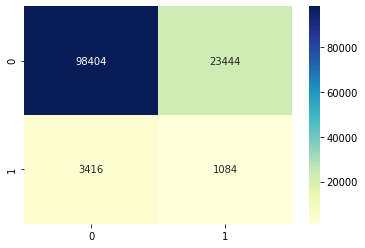

In [ ]:
#make predictions
prediction = rf.predict(x_test_3)
print ("Accuracy is: ", metrics.accuracy_score(y_test_3, prediction))
print("Mean Squared Error is:", np.sqrt(metrics.mean_squared_error(y_test_3, prediction)))
conf_matrix = metrics.confusion_matrix(y_test_3, prediction)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(metrics.classification_report(y_test_3, prediction))
print('The AUC score is: ', metrics.roc_auc_score(y_test_3, prediction))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88    121848
           1       0.04      0.24      0.07      4500

    accuracy                           0.79    126348
   macro avg       0.51      0.52      0.48    126348
weighted avg       0.93      0.79      0.85    126348

The AUC score is:  0.5242426192195742


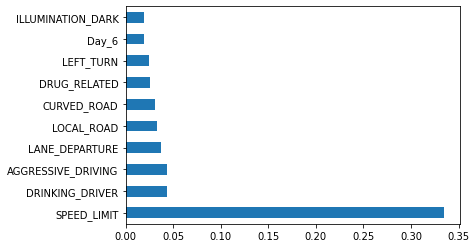

In [ ]:
feature_imp = pd.Series(rf.feature_importances_, index=x_train_3.columns)
feature_imp.nlargest(10).plot(kind='barh')

#Bernoulli Naive Bayes

In [ ]:
X_bayes = X.drop(columns = ['LEFT_TURN', 'LOCAL_ROAD', 'SPEED_LIMIT'])
x_train_bayes, x_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, Y, test_size = 0.2, random_state=42)

#reduces imbalance
ros_bayes = RandomOverSampler()
x_ros_bayes, y_ros_bayes = ros_bayes.fit_resample(x_train_bayes, y_train_bayes)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_ros_bayes, y_ros_bayes)
prediction = clf.predict(x_test_bayes)


In [ ]:
print("Accuracy is:", metrics.accuracy_score(y_test_bayes, prediction))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test_bayes, prediction)))

Accuracy is: 0.687870009814164
Mean Squared Error is: 0.5586859495153211


In [ ]:
print(metrics.classification_report(y_test_bayes, prediction))
print('The AUC score is: ', metrics.roc_auc_score(y_test_bayes, prediction))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81    121848
           1       0.06      0.50      0.10      4500

    accuracy                           0.69    126348
   macro avg       0.52      0.60      0.46    126348
weighted avg       0.94      0.69      0.79    126348

The AUC score is:  0.5985812268837678


[[84650 37198]
 [ 2239  2261]]


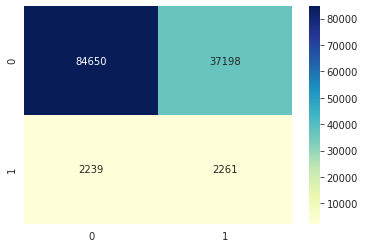

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test_bayes, prediction)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
factors = clf.feature_count_[1, :]
best_factors = pd.DataFrame({'factor':x_train_bayes.columns, 'fatal':factors}).set_index('factor')
best_factors = best_factors.sort_values(by = 'fatal', ascending = False)
best_factors

,fatal
factor,
Weather_3,415467.0
AGGRESSIVE_DRIVING,261450.0
LANE_DEPARTURE,215442.0
ILLUMINATION_DARK,191123.0
CURVED_ROAD,130222.0
DRINKING_DRIVER,95779.0
Day_7,84859.0
Day_6,77414.0
Day_1,75452.0
